<a href="https://colab.research.google.com/github/UMAIR-777/DATA-SCIENCE-PORTFOLIO/blob/main/Datascience__British_AIRWAYS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Web scraping and analysis
This Jupyter notebook includes some code to get you started with web scraping. We will use a package called BeautifulSoup to collect the data from the web. Once you've collected your data and saved it into a local .csv file you should start with your analysis.

Scraping data from Skytrax
If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use Python and BeautifulSoup to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import requests
from bs4 import BeautifulSoup

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages= 37
page_size=100
reviews = []
stars = []
date = []
country = []

for i in range(1, pages + 1):
  print(f"scraping page {i}")
  url = f"{base_url}/page{i}/?sortedby=post_date%3ADesc&pagesize={page_size}"
  response = requests.get(url)
  content = response.content
  parse_content = BeautifulSoup(content, "html.parser")
  for item in parse_content.find_all("div",class_="text_content"):
    reviews.append(item.text)
    for item in parse_content.find_all("div", class_="rating-10"):
      try:
        stars.append(item.span.text)
      except:print(f"Error on page{i}")
    stars.append("None")
for item in parse_content.find_all('time'):
   date.append(item.text)

for item in parse_content.find_all('h3'):
  country.append(item.span.next_sibling.text.strip("()"))

scraping page 1
scraping page 2
scraping page 3
scraping page 4
scraping page 5
scraping page 6
scraping page 7
scraping page 8
scraping page 9
scraping page 10
scraping page 11
scraping page 12
scraping page 13
scraping page 14
scraping page 15
scraping page 16
scraping page 17
scraping page 18
scraping page 19
scraping page 20
scraping page 21
scraping page 22
scraping page 23
scraping page 24
scraping page 25
scraping page 26
scraping page 27
scraping page 28
scraping page 29
scraping page 30
scraping page 31
scraping page 32
Error on page32
Error on page32
Error on page32
Error on page32
Error on page32
Error on page32
Error on page32
Error on page32
Error on page32
Error on page32
Error on page32
Error on page32
Error on page32
Error on page32
Error on page32
Error on page32
Error on page32
Error on page32
Error on page32
Error on page32
Error on page32
Error on page32
Error on page32
Error on page32
Error on page32
Error on page32
Error on page32
Error on page32
Error on page32
E

In [ ]:
country

[' (United Kingdom) ',
 ' (United Kingdom) ',
 ' (United Kingdom) ',
 ' (United Kingdom) ',
 ' (United Kingdom) ',
 ' (United Kingdom) ',
 ' (United Kingdom) ',
 ' (United Kingdom) ',
 ' (United States) ',
 ' (United Kingdom) ',
 ' (United States) ',
 ' (United Kingdom) ',
 ' (United Kingdom) ',
 ' (United Kingdom) ',
 ' (Australia) ',
 ' (United Kingdom) ',
 ' (Russian Federation) ',
 ' (South Africa) ',
 ' (United Kingdom) ',
 ' (Barbados) ',
 ' (United Kingdom) ',
 ' (United Kingdom) ',
 ' (Canada) ',
 ' (United Kingdom) ',
 ' (United Kingdom) ',
 ' (Australia) ',
 ' (United Kingdom) ',
 ' (United States) ',
 ' (Oman) ',
 ' (United States) ',
 ' (United Kingdom) ',
 ' (United Kingdom) ',
 ' (United Kingdom) ',
 ' (United Kingdom) ',
 ' (United Kingdom) ',
 ' (United Kingdom) ',
 ' (United Kingdom) ',
 ' (Canada) ',
 ' (United Kingdom) ',
 ' (Bulgaria) ',
 ' (United Kingdom) ',
 ' (United Kingdom) ',
 ' (United Kingdom) ',
 ' (India) ',
 ' (United Kingdom) ',
 ' (Australia) ',
 ' (Un

In [ ]:
len(reviews)

3699

In [ ]:
len(stars)

376699

In [ ]:
df_s = pd.DataFrame()
df_s['stars']= stars
df_s

,stars
0,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5
1,8
2,1
3,1
4,1
...,...
376694,9
376695,5
376696,4
376697,4


In [ ]:
df_s.to_csv("BA_stars.csv")

In [ ]:
 stars = pd.read_csv('BA_stars.csv')
stars = stars.pop('stars')

In [ ]:
stars.unique()

array(['\n\t\t\t\t\t\t\t\t\t\t\t\t\t5', '8', '1', '7', '2', '3', '6', '4',
       '5', '10', '9', 'None'], dtype=object)

In [ ]:
stars = stars.str.strip("\n\t\t\t\t\t\t\t\t\t\t\t\t\t")

In [ ]:
rating = stars.head(3698)

In [ ]:
reviews_1  =reviews.head(3698)

AttributeError: ignored

In [ ]:
reviews

['Not Verified |  Boarded on time, but it took ages to get to the runway due to congestion. Flight was smooth and quick. Snack and drinks were good for a short flight. Landed only about ten minutes late. One bag of three left in London, forms quickly filled in, and the bag was delivered the next morning.',
 "✅ Trip Verified |  5 days before the flight, we were advised by BA that it had been cancelled and asked us to rebook. There were flights 1 hour before and 1 hour after our original flight but they made us take one 3 hours earlier. Our original ticket (and the return flight a week later) included a checked bag. When we arrive at Heathrow to check in we are told our ticket doesn't included a bag and we will have to pay 75 pounds each to take them. We explained that the original ticket had the bags and when they checked the system they confirmed that it did- but not this one! They would make no effort to sort it out and just told us to pay up or they would remove us from the flight. S

In [ ]:
stars.unique()

array(['5', '8', '1', '7', '2', '3', '6', '4', '10', '9', 'None'],
      dtype=object)

In [ ]:
data = pd.DataFrame({'Reviews': reviews_1, 'Ratings': rating})

In [ ]:
data

,Reviews,Ratings
0,Verified Boarded time took ages runw...,5
1,days before flight were advised bee...,8
2,Verified \r\n traveled Lisbon dream vaca...,1
3,Booked flight Bucharest Manchester ’ ...,1
4,Booked online months hitch replacement...,1
...,...,...
3693,Just back Bridgetown Barbados flying Britis...,1
3694,Check apart being snapped being early ...,5
3695,Purser addresses club passengers name boa...,3
3696,worked British Airways urged British A...,5


In [ ]:
data['Ratings'] = pd.to_numeric(data['Ratings'], errors='coerce')


NameError: ignored

In [ ]:
data.dtypes

Reviews     object
Ratings    float64
dtype: object

In [ ]:
mean_value_np = np.mean(data['Ratings'])
print("Mean:", mean_value_np)

Mean: 3.0264882577826326


In [ ]:
mode_value = np.argmax(np.bincount(data['Ratings']))
print("Mode:", mode_value)

ValueError: ignored

In [ ]:
data.isnull().value_counts()

Reviews  Ratings
False    False      3698
dtype: int64

In [ ]:
min_rating = 4
max_rating =10

In [ ]:
highest_rating_reviews= data[data['Ratings'] == data['Ratings'].max()]


In [ ]:
high_rating_re = highest_rating_reviews
high_rating_re

,Reviews,Ratings
0,days before flight advised been ca...,8
1,Verified \r\n traveled Lisbon dream vaca...,8
2,Booked flight Bucharest Manchester ’ ...,8
3,Booked online months hitch replacement...,8
4,flight time crew polite same story ...,8
...,...,...
3693,July 2012 flew overnight premium econom...,8
3694,Purser addresses club passengers name boa...,8
3695,worked British Airways urged British A...,8
3696,London City York Shannon A318 nice seats...,8


KeyError: ignored

In [ ]:
hist, bins = np.histogram(data, bins=30)
print("Frequency counts:", hist)
print("Bin edges:", bins)

TypeError: ignored

In [ ]:
filtered_data.head(10)

,Reviews,Ratings
0,days before flight advised been ca...,8
1,Verified \r\n traveled Lisbon dream vaca...,8
2,Booked flight Bucharest Manchester ’ ...,8
3,Booked online months hitch replacement...,8
4,flight time crew polite same story ...,8
5,Verified Angry disappointed unsatisfied r...,8
6,infrequent flyer British Airways always ...,8
7,Verified totally unremarkable flight time...,8
8,Ground crew Heathrow left passengers lu...,8
9,London Heathrow Gibraltar 24th October 20...,8


In [ ]:
re_1 = pd.Series(' '.join(high_rating_re['Reviews']).lower().split()).value_counts()[:100]

In [ ]:
wordcloud_dict = {word: count for word, count in zip(re_1.index, re_1)}


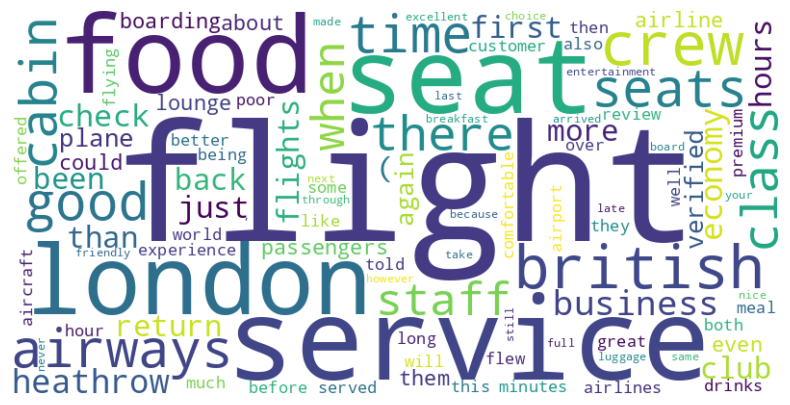

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_dict)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
sorted_df = data.sort_values(by='Ratings')


In [ ]:
lowest_rating_reviews = sorted_df['Reviews'][:3]

In [ ]:
lowest_rating_reviews.head()

3697     BA12 B747 First Class  aircraft (1998)  seats...
3230        //2014 Pros: Lighting window blinds large ...
3228    Washington    Trip     good start    Concorde ...
Name: Reviews, dtype: object

In [ ]:
ratings_1_3 = data[data.Ratings.isin([1,2,3])]
ratings_4_6 = data[data.Ratings.isin([4,5,6])]
ratings_7_10 = data[data.Ratings.isin([7,2,8,9,10])]

In [ ]:
ratings_1_3.head(5)

,Reviews,Ratings


In [ ]:
reviews_10 = data[data['Ratings']==5]

In [ ]:
data['Ratings']=8

In [ ]:
data_1 = data[data["Ratings"]==6]
data_1.head()

,Reviews,Ratings


In [ ]:
data['Ratings'].unique()

array([8])

In [ ]:
reviews_10 = data[data['Rtings']==10]
reviews_4_6 = " ".join(ratings_4_6.Reviews)
reviews_7_10 = " ".join(ratings_7_10.Reviews)

In [ ]:
reviews_7_10

''

In [ ]:
word_1_3 = reviews_1_3.split(" ")
word_4_6 = reviews_4_6.split(" ")
word_7_10 = reviews_7_10.split(" ")

In [ ]:
word_7_10

['']

In [ ]:
new_word_7_10 = [word for word in word_7_10 if word not in Stopwords]
get_freq_dist(new_word_7_10,4)

NameError: ignored

In [ ]:
stars.drop(stars[stars=='None'].index,)

0         5
1         8
2         1
3         1
4         1
         ..
376693    8
376694    9
376695    5
376696    4
376697    4
Name: stars, Length: 373000, dtype: object

In [ ]:
df_c = pd.DataFrame()
df_c["country"]=country
df_c

,country
0,(United Kingdom)
1,(Canada)
2,(United Kingdom)
3,(United Kingdom)
4,(United Kingdom)
...,...
94,(Canada)
95,(United Kingdom)
96,(United Kingdom)
97,(United States)


In [ ]:
df_c.value_counts()

country               
 (United Kingdom)         75
 (United States)           6
 (Australia)               5
 (Canada)                  3
 (Belgium)                 2
 (India)                   2
 (Barbados)                1
 (Bulgaria)                1
 (Ireland)                 1
 (Oman)                    1
 (Russian Federation)      1
 (South Africa)            1
dtype: int64

In [ ]:
df_country

In [ ]:
df_country=  df_c['country'].str.replace(r'\(|\)', '', regex=True)

In [ ]:
stars_country = data['Ratings'].head(99)

NameError: ignored

In [ ]:
stars_country

0     5.0
1     8.0
2     1.0
3     1.0
4     1.0
     ... 
93    1.0
94    4.0
95    8.0
96    2.0
97    2.0
Name: Ratings, Length: 98, dtype: float64

In [ ]:
df_country =

0      United Kingdom 
1      United Kingdom 
2      United Kingdom 
3      United Kingdom 
4      United Kingdom 
            ...       
94     United Kingdom 
95     United Kingdom 
96     United Kingdom 
97      United States 
98     United Kingdom 
Name: country, Length: 99, dtype: object

In [ ]:
data

,Reviews,Ratings
0,Verified Boarded time took ages runw...,5.0
1,days before flight were advised bee...,8.0
2,Verified \r\n traveled Lisbon dream vaca...,1.0
3,Booked flight Bucharest Manchester ’ ...,1.0
4,Booked online months hitch replacement...,1.0
...,...,...
3693,Just back Bridgetown Barbados flying Britis...,1.0
3694,Check apart being snapped being early ...,5.0
3695,Purser addresses club passengers name boa...,3.0
3696,worked British Airways urged British A...,5.0


In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [ ]:
sns.countplot(x='Country', data=df_country, palette="Set3")
plt.title('Count of Countries')
plt.show()

ValueError: ignored

In [ ]:
df_customer = pd.DataFrame({'Country':country, 'RATINGS': Rating})

NameError: ignored

In [ ]:
import string

In [ ]:
df_c.nunique().sum()

12

In [ ]:
df = pd.DataFrame()
df["reviews"]=reviews
df

,reviews
0,"Not Verified | Boarded on time, but it took a..."
1,"✅ Trip Verified | 5 days before the flight, w..."
2,Not Verified | \r\nWe traveled to Lisbon for ...
3,✅ Trip Verified | Booked a flight from Buchar...
4,✅ Trip Verified | Booked online months ago an...
...,...
3694,YYZ to LHR - July 2012 - I flew overnight in p...
3695,LHR to HAM. Purser addresses all club passenge...
3696,My son who had worked for British Airways urge...
3697,London City-New York JFK via Shannon on A318 b...


In [ ]:
df.to_csv("BA_reviews.csv")

In [ ]:
reviews = pd.read_csv('BA_reviews.csv')
reviews = reviews.pop('reviews')
reviews

0       Not Verified |  Boarded on time, but it took a...
1       ✅ Trip Verified |  5 days before the flight, w...
2       Not Verified |  \r\nWe traveled to Lisbon for ...
3       ✅ Trip Verified |  Booked a flight from Buchar...
4       ✅ Trip Verified |  Booked online months ago an...
                              ...                        
3694    YYZ to LHR - July 2012 - I flew overnight in p...
3695    LHR to HAM. Purser addresses all club passenge...
3696    My son who had worked for British Airways urge...
3697    London City-New York JFK via Shannon on A318 b...
3698    SIN-LHR BA12 B747-436 First Class. Old aircraf...
Name: reviews, Length: 3699, dtype: object

In [ ]:
def remove_puntuations(text):
  for punctuation in string.punctuation:
    text = text.replace(punctuation, '')
    return text

In [ ]:
reviews = reviews.str.replace('Trip Verified |','')
reviews = reviews.str.replace('✅','')
reviews = reviews.str.replace('|','')
reviews = reviews.str.replace(r'\b(\w{1,3})\b','')
reviews = reviews.str.replace('-','')
reviews = reviews.str.replace(',','')
reviews = reviews.str.replace('.','')
reviews = reviews.str.replace("'","")
reviews = reviews.str.replace("Were","")
reviews = reviews.str.replace("very","")
reviews = reviews.str.replace("that","")
reviews = reviews.str.replace('this','')
reviews = reviews.str.replace("their","")
reviews = reviews.str.replace("they","")
reviews = reviews.str.replace("from","")
reviews = reviews.str.replace("only","")
reviews = reviews.str.replace("Will","")
reviews = reviews.str.replace("other","")
reviews = reviews.str.replace("really","")
reviews = reviews.str.replace("what","")
reviews = reviews.str.replace("would","")
reviews = reviews.str.replace("with","")
reviews = reviews.str.replace("which","")
reviews = reviews.str.replace("have","")
reviews = reviews.str.replace("Were","")
reviews = reviews.str.replace("after","")


reviews = reviews.apply(remove_puntuations)
reviews

<ipython-input-19-66437de02084>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews = reviews.str.replace('Trip Verified |','')
<ipython-input-19-66437de02084>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  reviews = reviews.str.replace('|','')
<ipython-input-19-66437de02084>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews = reviews.str.replace(r'\b(\w{1,3})\b','')
<ipython-input-19-66437de02084>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  reviews = reviews.str.replace('.','')


0        Verified   Boarded  time   took ages     runw...
1           days before  flight  were advised      bee...
2        Verified   \r\n traveled  Lisbon   dream vaca...
3          Booked  flight  Bucharest  Manchester    ’ ...
4          Booked online months     hitch  replacement...
                              ...                        
3694        July 2012   flew overnight  premium econom...
3695       Purser addresses  club passengers  name boa...
3696        worked  British Airways urged    British A...
3697    London City York   Shannon  A318    nice seats...
3698     BA12 B747 First Class  aircraft (1998)  seats...
Name: reviews, Length: 3699, dtype: object

In [ ]:
import string

In [ ]:
reviews.head(10)

0        days before  flight   advised      been ca...
1     Verified   \r\n traveled  Lisbon   dream vaca...
2       Booked  flight  Bucharest  Manchester    ’ ...
3       Booked online months     hitch  replacement...
4        flight   time  crew  polite    same story ...
5     Verified   Angry disappointed  unsatisfied  r...
6         infrequent flyer British Airways  always ...
7     Verified    totally unremarkable flight  time...
8         Ground crew  Heathrow left  passengers lu...
9       London Heathrow  Gibraltar  24th October 20...
Name: reviews, dtype: object

In [ ]:
reviews.shape

(3699,)

In [ ]:
reviews_1 = reviews.head(3698)

In [ ]:
reviews_1 = reviews.head(3698)

In [ ]:
nan = pd.Series(' '.join(reviews).lower().split()).value_counts()[:100]

In [ ]:
freq_words = pd.Series(' '.join(reviews_1).lower().split()).value_counts()[:50]

KeyError: ignored

In [ ]:
pip install matplotlib pandas wordcloud

In [ ]:
wordcloud_dict = {word: count for word, count in zip(na.index, nan)}


NameError: ignored

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_dict)

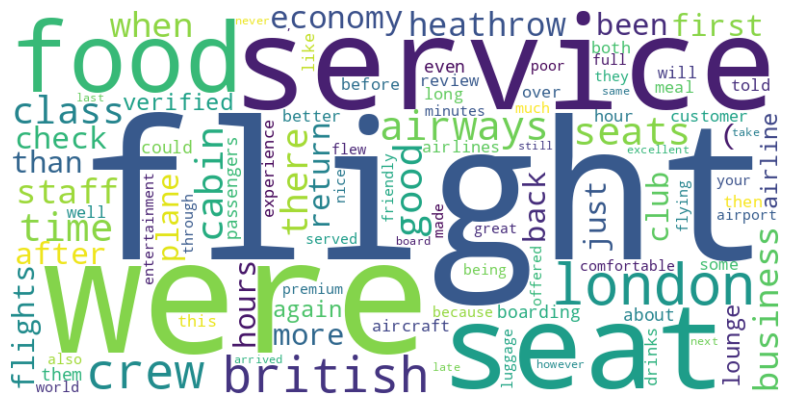

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from wordcloud import WordCloud

In [ ]:
freq_words

flight        6636
were          4471
service       2783
seat          2337
food          2319
london        2160
british       2150
crew          2132
airways       2120
seats         2064
good          2049
time          2046
cabin         1948
class         1824
there         1765
when          1578
staff         1571
business      1540
heathrow      1522
economy       1394
check         1271
first         1260
flights       1166
more          1154
been          1133
return        1108
just          1090
than          1077
club          1071
back          1060
(             1057
hours         1039
plane         1026
again         1024
verified      1009
lounge        1007
airline       1004
boarding      1000
passengers     991
them           980
about          978
even           967
could          963
experience     895
will           876
before         869
some           863
aircraft       862
then           858
review         853
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

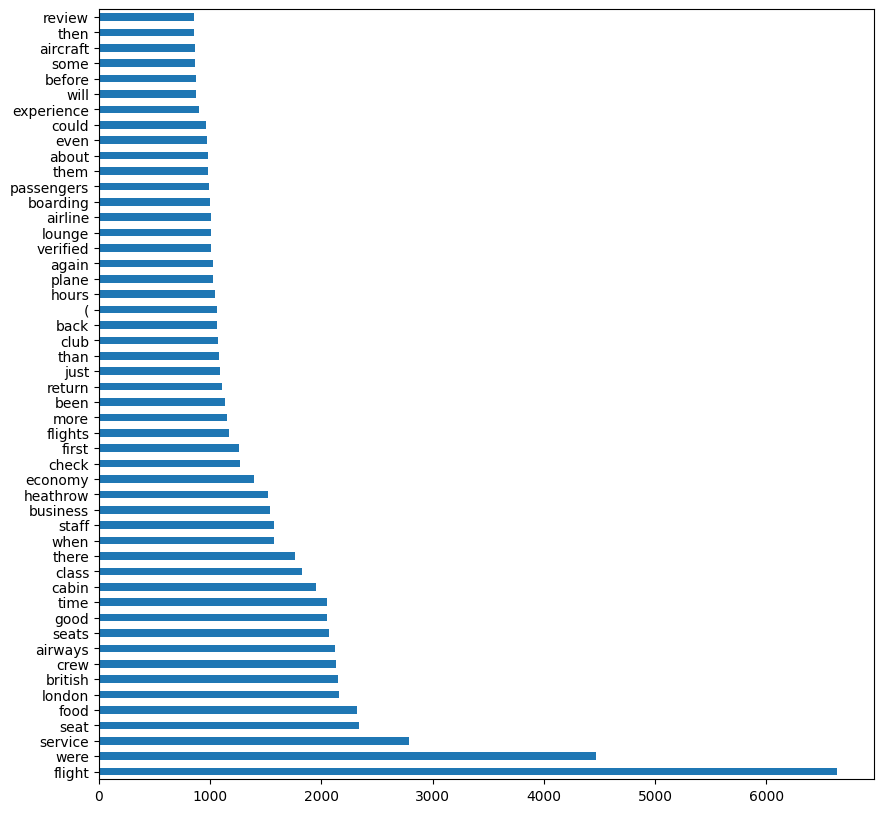

In [ ]:
plt.figure(figsize=(10,10))
freq_words.plot.barh(x=freq_words[0] , y=freq_words[1])
plt.show

In [ ]:
categories = ['negative', 'positive']
num_cat = len(categories)
num_cat

2

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')


In [ ]:
tf_idf_vec = TfidfVectorizer(lowercase=True,stop_words='english', ngram_range=(1,1),tokenizer = tokenizer.tokenize)

In [ ]:
reviews_counts = tf_idf_vec.fit_transform(reviews_1)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
reviews_counts.shape

(3698, 12675)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=num_cat).fit(reviews_counts)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
pred_labels = kmeans.labels_
pred_labels

array([0, 1, 1, ..., 0, 1, 0], dtype=int32)

In [ ]:
cluster_centers = kmeans.cluster_centers_
cluster_centers

array([[0.00000000e+00, 0.00000000e+00, 6.54734853e-05, ...,
        1.58187150e-04, 6.37931602e-05, 0.00000000e+00],
       [1.91026461e-04, 1.23548168e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 6.33220104e-05]])

In [ ]:
unique,counts = np.unique(pred_labels, return_counts=True)
dict(zip(unique, counts))

{0: 2251, 1: 1447}

In [ ]:
from sklearn import metrics

In [ ]:
dbi = metrics.davies_bouldin_score(reviews_counts.toarray(),pred_labels)
ss= metrics.silhouette_score(reviews_counts.toarray(),pred_labels, metric='euclidean')

In [ ]:
print("DBI SCORE:",dbi, "\nsilhouette:", ss)

DBI SCORE: 12.36794280771456 
silhouette: 0.006862813705804106


In [ ]:
df_reviews = pd.DataFrame({'reviews': reviews_1, 'labels': pred_labels})
df_reviews

,reviews,labels
0,Verified Boarded time took ages runw...,0
1,days before flight were advised bee...,1
2,Verified \r\n traveled Lisbon dream vaca...,1
3,Booked flight Bucharest Manchester ’ ...,1
4,Booked online months hitch replacement...,0
...,...,...
3693,Club World Boeing // Bought ticket + m...,0
3694,July 2012 flew overnight premium econom...,0
3695,Purser addresses club passengers name boa...,0
3696,worked British Airways urged British A...,1


In [ ]:
positive_review = df_reviews[df_reviews['labels']==1]
positive_review

,reviews,labels
1,days before flight were advised bee...,1
2,Verified \r\n traveled Lisbon dream vaca...,1
3,Booked flight Bucharest Manchester ’ ...,1
6,Verified Angry disappointed unsatisfied r...,1
7,infrequent flyer British Airways always ...,1
...,...,...
3684,Heathrow Marrakech previously travelled Bri...,1
3690,Business First back about years durin...,1
3691,This Regional operated flight RJ145 Manc...,1
3693,Just back Bridgetown Barbados flying Britis...,1


In [ ]:
negative_review = df_reviews[df_reviews['labels']==0]
negative_review

,reviews,labels
0,Verified Boarded time took ages runw...,0
4,Booked online months hitch replacement...,0
5,flight time crew were polite same st...,0
11,First time flying British Airways hesita...,0
12,Verified flew London Cairo return Octob...,0
...,...,...
3689,Flight Heathrow Toronto Booked emergency exi...,0
3692,Boeing // Much been written about tired ...,0
3694,Check apart being snapped being early ...,0
3695,Purser addresses club passengers name boa...,0


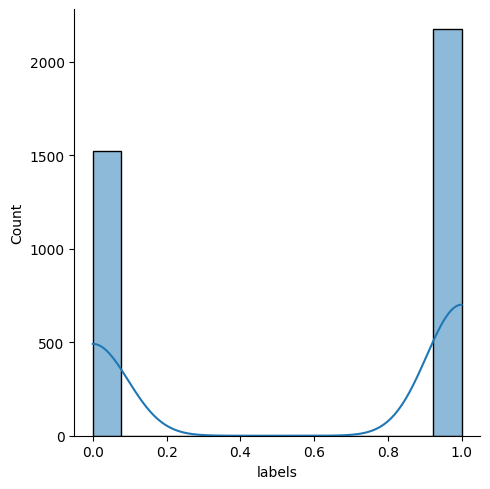

In [ ]:
sns.displot(df_reviews['labels'],kde=True)

In [ ]:
Task 2 - Predict customer buying behaviour
get data


%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


data= '/customer_booking.csv'



import chardet

with open('/customer_booking.csv', 'rb') as rawdata:
  result = chardet.detect(rawdata.read(100000))

print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

df= pd.read_csv(data, encoding='ISO-8859-1')


df.head()

num_passengers	sales_channel	trip_type	purchase_lead	length_of_stay	flight_hour	flight_day	route	booking_origin	wants_extra_baggage	wants_preferred_seat	wants_in_flight_meals	flight_duration	booking_complete
0	2	Internet	RoundTrip	262	19	7	Sat	AKLDEL	New Zealand	1	0	0	5.52	0
1	1	Internet	RoundTrip	112	20	3	Sat	AKLDEL	New Zealand	0	0	0	5.52	0
2	2	Internet	RoundTrip	243	22	17	Wed	AKLDEL	India	1	1	0	5.52	0
3	1	Internet	RoundTrip	96	31	4	Sat	AKLDEL	New Zealand	0	0	1	5.52	0
4	2	Internet	RoundTrip	68	22	15	Wed	AKLDEL	India	1	0	1	5.52	0
Exploratory Data Analysis

#checking for datatypes

df.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

df.shape

(50000, 14)

#null values

df.isnull().sum()

#there is no null values

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

df.booking_complete.value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64
Mutual Information

X= df.drop('booking_complete',axis=1)
y= df.booking_complete

#changing object dtype to int dtype
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()


X.dtypes

num_passengers             int64
sales_channel              int64
trip_type                  int64
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                      int64
booking_origin             int64
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
dtype: object

from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores # show a few features with their MI scores

route                    0.051057
booking_origin           0.046168
flight_duration          0.018031
length_of_stay           0.008297
wants_extra_baggage      0.006588
num_passengers           0.003603
purchase_lead            0.003480
flight_hour              0.002446
wants_in_flight_meals    0.001987
flight_day               0.000921
sales_channel            0.000000
trip_type                0.000000
wants_preferred_seat     0.000000
Name: MI Scores, dtype: float64

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)



sns.jointplot(data=df,x='route',y='')

We can see

route
booking_origin
flight_duration
wants_extra_baggage
length_of_stay
are the top 5 features which are dependant with booking_complete feature


#test train split

from sklearn.model_selection import train_test_split

# dataset split
# creating a function for dataset split
def dataset(X,y):
    train_full_X, val_X, train_full_y, val_y = train_test_split(X, y,test_size=0.2,random_state = 0)

# Use the same function above for the validation set
    train_X, test_X, train_y, test_y = train_test_split(train_full_X, train_full_y, test_size=0.25,random_state = 0)
    return (train_X, val_X, train_y, val_y)


from sklearn.preprocessing import MinMaxScaler

def scale(X):
    scaler = MinMaxScaler()
    scaler.fit(X)
    return X

Model 1 : Random forest classifier with top 6 features

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier



#assigning the features under a list

features=['route','booking_origin','flight_duration','wants_extra_baggage', 'length_of_stay','num_passengers']
X= df[features]
#one hot encoding
X = pd.get_dummies(X, columns=features)
X= scale(X)
y= df.booking_complete

X_train,X_val,y_train,y_val= dataset(X,y)

forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)
preds= forest_model.predict(X_val)

print('ACCURACY: ',accuracy_score(y_val,preds)*100)
print('AUC score: ',roc_auc_score(y_val,preds))

ACCURACY:  83.36
AUC score:  0.5657818407546988
Model 2 : Random forest classifier with all features

X= df.drop('booking_complete',axis=1)
#one hot encoding
X = pd.get_dummies(X)
X= scale(X)
y= df.booking_complete

X_train,X_val,y_train,y_val= dataset(X,y)

forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)
preds= forest_model.predict(X_val)

print('ACCURACY: ',accuracy_score(y_val,preds)*100)
print('AUC score: ',roc_auc_score(y_val,preds))

ACCURACY:  84.76
AUC score:  0.5479604084813514